<a href="https://colab.research.google.com/github/parthkohli92/Practice-Projects/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm gonna conect my kaggle account to my google colab notebook

In [1]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parthkohliii","key":"4f055e2e21bc7b59fac1c8d622fd6096"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!mkdir traffic_sign_dataset 
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          42505  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           6834  
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            224  
valentynsichkar/traffic-signs-1-million-images-for-classification  Traffic Signs 1 million images for Classification   20GB  2021-02-08 16:45:43            167  
valentynsichkar/preprocessed

In [6]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 99% 607M/612M [00:04<00:00, 151MB/s]
100% 612M/612M [00:04<00:00, 154MB/s]
/content


In [7]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/Meta.csv

In [9]:
# Importing reqd libraries 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random 
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

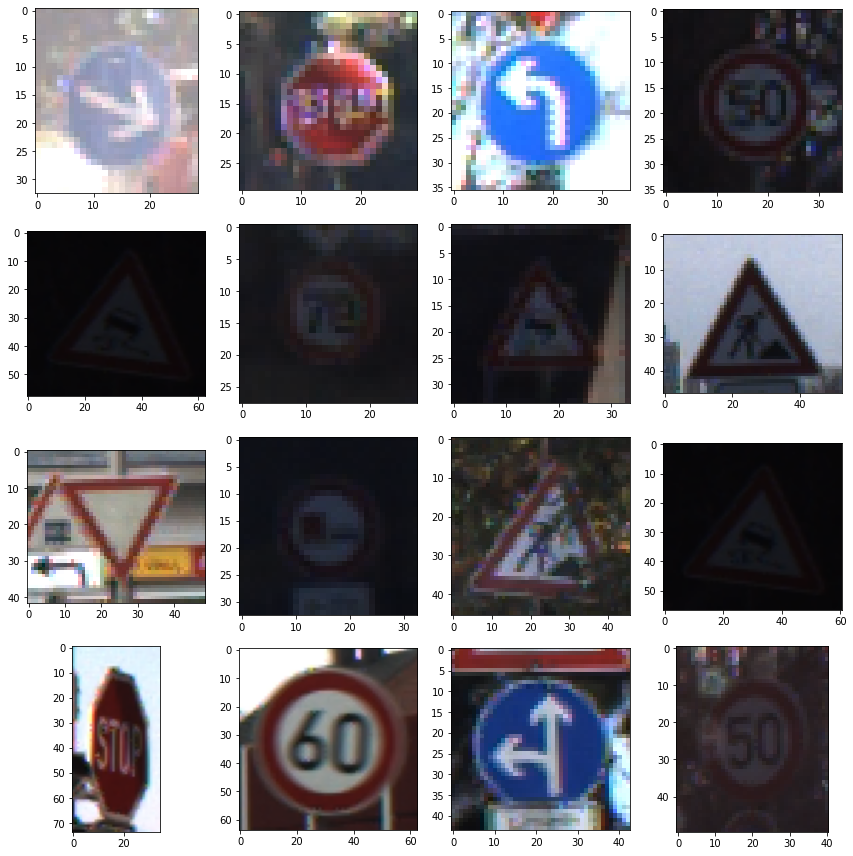

In [10]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)

The size of some images are not same, hence we resize them into a standard size

In [11]:
dim1 = []
dim2 = []

for i in range(1,43):
  labels= 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [12]:
np.mean(dim1) , np.mean(dim2)

(50.30993102387241, 50.824713454191134)

Reshaping them into (50,50) dimension

In [13]:
images = []
label_id = []

for i in range(43):
  labels= 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [14]:
# converting images into numpy array
images = np.array(images)
images = images/255

In [15]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [16]:
images.shape

(39209, 50, 50, 3)

In [17]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [18]:
# splitting 
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.3, random_state=42)

70:30 train:validation ratio

In [19]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

In [25]:
# Model building 

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=x_train.shape[1:],activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(4,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 25, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 23, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 11, 64)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 11, 64)        

In [27]:
model.fit(x_train, y_train, epochs=55, batch_size=128, validation_data=(x_val,y_val),verbose=2)

Epoch 1/55
215/215 - 15s - loss: 2.7937 - accuracy: 0.2433 - val_loss: 1.7700 - val_accuracy: 0.5058 - 15s/epoch - 70ms/step
Epoch 2/55
215/215 - 5s - loss: 1.5905 - accuracy: 0.5054 - val_loss: 0.9038 - val_accuracy: 0.7800 - 5s/epoch - 25ms/step
Epoch 3/55
215/215 - 5s - loss: 1.0671 - accuracy: 0.6526 - val_loss: 0.5315 - val_accuracy: 0.8715 - 5s/epoch - 25ms/step
Epoch 4/55
215/215 - 5s - loss: 0.8192 - accuracy: 0.7312 - val_loss: 0.3663 - val_accuracy: 0.9120 - 5s/epoch - 25ms/step
Epoch 5/55
215/215 - 5s - loss: 0.6835 - accuracy: 0.7741 - val_loss: 0.3012 - val_accuracy: 0.9321 - 5s/epoch - 25ms/step
Epoch 6/55
215/215 - 5s - loss: 0.5895 - accuracy: 0.8054 - val_loss: 0.2374 - val_accuracy: 0.9467 - 5s/epoch - 25ms/step
Epoch 7/55
215/215 - 5s - loss: 0.5238 - accuracy: 0.8271 - val_loss: 0.1953 - val_accuracy: 0.9600 - 5s/epoch - 25ms/step
Epoch 8/55
215/215 - 5s - loss: 0.4812 - accuracy: 0.8400 - val_loss: 0.1748 - val_accuracy: 0.9615 - 5s/epoch - 25ms/step
Epoch 9/55
215

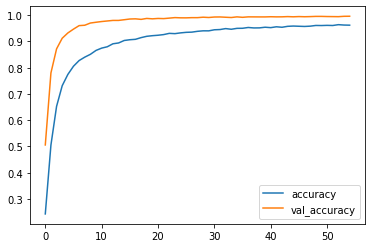

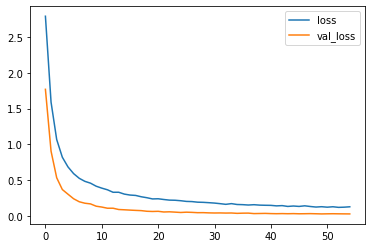

In [28]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [29]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [30]:
# scaling the images 
from PIL import Image
def scaling(test_images, test_path):
  images=[]
  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)


  images = np.array(images)
  images = images/255

  return images

In [31]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [32]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [47]:
y_pred = model.predict(test_images)
y_pred = np.round(y_pred).astype(int)
y_pred


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:

all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

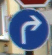

In [42]:
# Visualize test image
img = Image.open(test_path + '/00021.png')
img

In [48]:
# Original label
print("Original label : ",all_lables[y_test[21]])

Original label :  Turn right ahead
